In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Definimos el tamaño de la cuadrícula
grid_size = 16  # Tamaño del mallado (50x50 por ejemplo)

# Inicializamos la cuadrícula con ceros
potential = np.zeros((grid_size, grid_size))

# Condiciones de frontera
potential[:, 0] = 0  # Borde izquierdo
potential[:, -1] = 0  # Borde derecho
potential[0, :] = 0  # Borde superior
potential[-1, :] = 0  # Borde inferior

In [27]:
# Definir un cuadrado interno con potencial φ=100
internal_square_size = 10  # Tamaño del cuadrado interno
start = (grid_size - internal_square_size) // 2
end = start + internal_square_size

potential[start:end, start:end] = 100  # Región interna a φ = 100

In [28]:
def relaxation_step(potential, tolerance=1e-6):
    max_diff = tolerance + 1  # Iniciar con una diferencia mayor al criterio
    while max_diff > tolerance:
        new_potential = potential.copy()  # Crear una copia de los valores actuales
        max_diff = 0  # Inicializar la diferencia máxima

        # Actualizar cada punto interno de la cuadrícula
        for i in range(1, grid_size - 1):
            for j in range(1, grid_size - 1):
                if not (start <= i < end and start <= j < end):  # Saltar la región de φ = 100
                    new_value = 0.25 * (potential[i+1, j] + potential[i-1, j] +
                                        potential[i, j+1] + potential[i, j-1])
                    max_diff = max(max_diff, abs(new_value - potential[i, j]))
                    new_potential[i, j] = new_value

        potential = new_potential  # Actualizar la cuadrícula con los nuevos valores
        print(f"Máxima diferencia en esta iteración: {max_diff}")
    
    return potential


Máxima diferencia en esta iteración: 25.0
Máxima diferencia en esta iteración: 12.5
Máxima diferencia en esta iteración: 7.8125
Máxima diferencia en esta iteración: 6.25
Máxima diferencia en esta iteración: 4.1015625
Máxima diferencia en esta iteración: 3.7109375
Máxima diferencia en esta iteración: 2.374267578125
Máxima diferencia en esta iteración: 2.20947265625
Máxima diferencia en esta iteración: 1.3881683349609375
Máxima diferencia en esta iteración: 1.3042449951171875
Máxima diferencia en esta iteración: 0.8103370666503906
Máxima diferencia en esta iteración: 0.7650256156921387
Máxima diferencia en esta iteración: 0.47174543142318726
Máxima diferencia en esta iteración: 0.4467472434043884
Máxima diferencia en esta iteración: 0.27393950149416924
Máxima diferencia en esta iteración: 0.26001371443271637
Máxima diferencia en esta iteración: 0.15873004449531436
Máxima diferencia en esta iteración: 0.15093126276042312
Máxima diferencia en esta iteración: 0.09180546439893078
Máxima dife

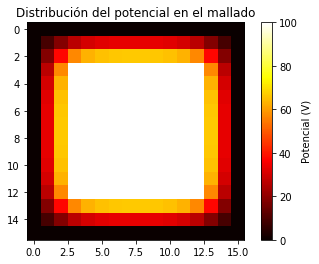

In [29]:
def plot_potential(potential):
    plt.imshow(potential, cmap='hot', interpolation='nearest')
    plt.colorbar(label="Potencial (V)")
    plt.title("Distribución del potencial en el mallado")
    plt.show()

# Ejecutamos el método de relajación y graficamos
relaxed_potential = relaxation_step(potential)
plot_potential(relaxed_potential)


Máxima diferencia en esta iteración: 25.0
Máxima diferencia en esta iteración: 12.5
Máxima diferencia en esta iteración: 7.8125
Máxima diferencia en esta iteración: 6.25
Máxima diferencia en esta iteración: 4.1015625
Máxima diferencia en esta iteración: 3.7109375
Máxima diferencia en esta iteración: 2.374267578125
Máxima diferencia en esta iteración: 2.20947265625
Máxima diferencia en esta iteración: 1.3881683349609375
Máxima diferencia en esta iteración: 1.3042449951171875
Máxima diferencia en esta iteración: 0.8103370666503906
Máxima diferencia en esta iteración: 0.7650256156921387
Máxima diferencia en esta iteración: 0.47174543142318726
Máxima diferencia en esta iteración: 0.4467472434043884
Máxima diferencia en esta iteración: 0.27393950149416924
Máxima diferencia en esta iteración: 0.26001371443271637
Máxima diferencia en esta iteración: 0.15873004449531436
Máxima diferencia en esta iteración: 0.15093126276042312
Máxima diferencia en esta iteración: 0.09180546439893078
Máxima dife

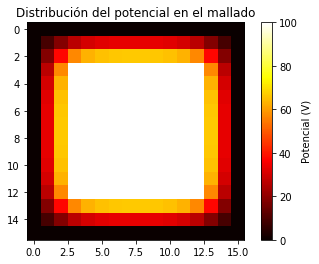

In [30]:
def plot_potential(potential):
    plt.imshow(potential, cmap='hot', interpolation='nearest')
    plt.colorbar(label="Potencial (V)")
    plt.title("Distribución del potencial en el mallado")
    plt.show()

# Ejecutamos el método de relajación y graficamos
relaxed_potential = relaxation_step(potential)
plot_potential(relaxed_potential)


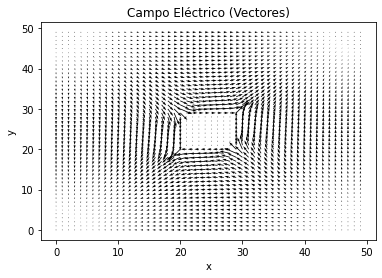

In [6]:
def calculate_electric_field(potential):
    # Calculamos el gradiente (derivadas parciales) del potencial
    Ex, Ey = np.gradient(-potential)
    return Ex, Ey

def plot_electric_field(Ex, Ey):
    plt.quiver(Ex, Ey)
    plt.title("Campo Eléctrico (Vectores)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Calcular el campo eléctrico y graficarlo
Ex, Ey = calculate_electric_field(relaxed_potential)
plot_electric_field(Ex, Ey)


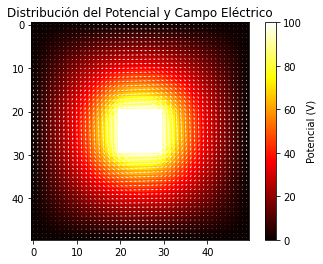

In [7]:
def plot_potential_and_field(potential, Ex, Ey):
    plt.imshow(potential, cmap='hot', interpolation='nearest')
    plt.colorbar(label="Potencial (V)")
    plt.quiver(Ex, Ey, color='white')  # Añadimos las líneas de campo en el mismo gráfico
    plt.title("Distribución del Potencial y Campo Eléctrico")
    plt.show()

# Graficar el potencial con el campo eléctrico
plot_potential_and_field(relaxed_potential, Ex, Ey)


In [8]:
import math

def apply_circle_boundary(potential, radius, center):
    for i in range(grid_size):
        for j in range(grid_size):
            # Calcular la distancia del centro
            distance = np.sqrt((i - center[0])**2 + (j - center[1])**2)
            if abs(distance - radius) < 1:  # Cercano al radio del círculo
                # Convertir a coordenadas polares para aplicar φ(θ) = sin²θ
                theta = np.arctan2(j - center[1], i - center[0])
                potential[i, j] = np.sin(theta)**2

# Nuevo potencial inicial con círculo interno
potential = np.zeros((grid_size, grid_size))

# Definir el radio y el centro del círculo
radius = grid_size // 4
center = (grid_size // 2, grid_size // 2)

# Aplicamos la condición de borde del círculo φ(θ) = sin²θ
apply_circle_boundary(potential, radius, center)


Máxima diferencia en esta iteración: 0.7459016393442623
Máxima diferencia en esta iteración: 0.37662577727529684
Máxima diferencia en esta iteración: 0.2201003317602842
Máxima diferencia en esta iteración: 0.19635367431041983
Máxima diferencia en esta iteración: 0.14124976119184307
Máxima diferencia en esta iteración: 0.13081282213353496
Máxima diferencia en esta iteración: 0.10440544131145868
Máxima diferencia en esta iteración: 0.09746612466554305
Máxima diferencia en esta iteración: 0.08269727755397382
Máxima diferencia en esta iteración: 0.0773564993714389
Máxima diferencia en esta iteración: 0.06824677281495939
Máxima diferencia en esta iteración: 0.06399043923493425
Máxima diferencia en esta iteración: 0.05795503524174775
Máxima diferencia en esta iteración: 0.05456068776538392
Máxima diferencia en esta iteración: 0.05031981723891177
Máxima diferencia en esta iteración: 0.047639187960533014
Máxima diferencia en esta iteración: 0.04449697127543212
Máxima diferencia en esta iteraci

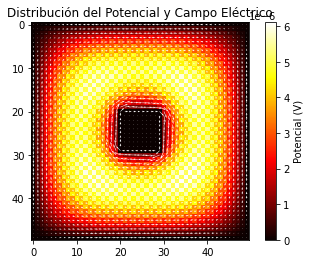

In [9]:
# Relajación para el caso de φ(θ) = sin²θ
relaxed_potential_circle = relaxation_step(potential)

# Calcular el campo eléctrico para el caso del círculo
Ex_circle, Ey_circle = calculate_electric_field(relaxed_potential_circle)

# Graficar el potencial y el campo eléctrico para φ(θ) = sin²θ
plot_potential_and_field(relaxed_potential_circle, Ex_circle, Ey_circle)
